<a href="https://colab.research.google.com/github/jojoneku/test_neural-network_model/blob/main/MNIST_TESTMODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Build the neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with SGD optimizer
history_sgd = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7136 - loss: 1.0933 - val_accuracy: 0.8967 - val_loss: 0.3808
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8942 - loss: 0.3828 - val_accuracy: 0.9117 - val_loss: 0.3134
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9084 - loss: 0.3224 - val_accuracy: 0.9193 - val_loss: 0.2828
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9168 - loss: 0.2903 - val_accuracy: 0.9251 - val_loss: 0.2614
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9232 - loss: 0.2666 - val_accuracy: 0.9297 - val_loss: 0.2440
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9286 - loss: 0.2469 - val_accuracy: 0.9358 - val_loss: 0.2291
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9338 - loss: 0.2300 - val_accuracy: 0.9398 - val_loss: 0.2160
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9387 - loss: 0.2152 - 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Define a function to build and compile the model with different optimizers
def build_and_train_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)
    return history

# Train models with different optimizers
history_adam = build_and_train_model('adam')
history_rmsprop = build_and_train_model('rmsprop')

# Optionally, you can print the history to check training performance
print(f"Adam Optimizer: {history_adam.history['accuracy'][-1]:.4f}, Validation Accuracy: {history_adam.history['val_accuracy'][-1]:.4f}")
print(f"RMSprop Optimizer: {history_rmsprop.history['accuracy'][-1]:.4f}, Validation Accuracy: {history_rmsprop.history['val_accuracy'][-1]:.4f}")


Adam Optimizer: 0.9966, Validation Accuracy: 0.9744
RMSprop Optimizer: 0.9937, Validation Accuracy: 0.9723


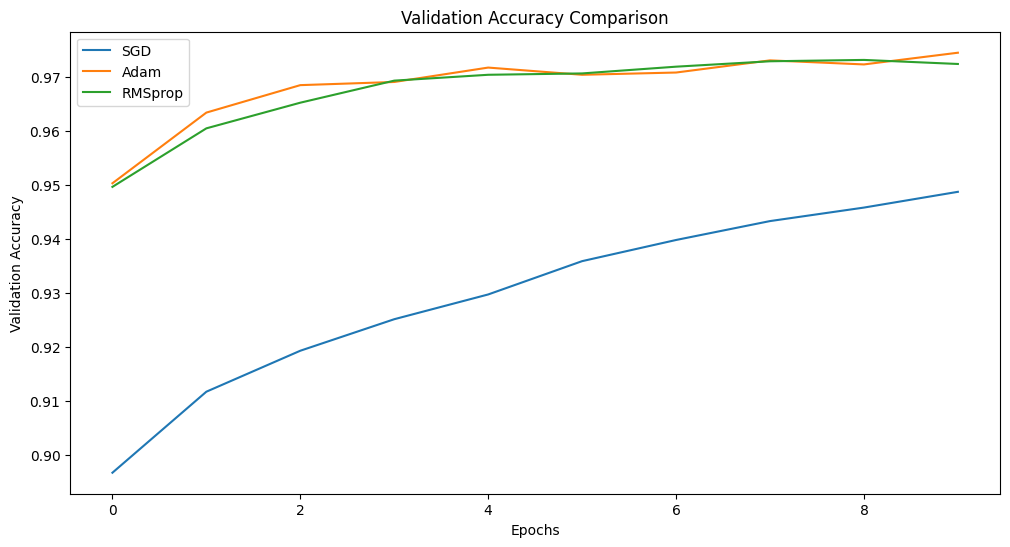

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_history(histories, title):
    plt.figure(figsize=(12, 6))
    for name, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=name)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.show()

# Plot the validation accuracy for each optimizer
histories = {'SGD': history_sgd, 'Adam': history_adam, 'RMSprop': history_rmsprop}
plot_history(histories, 'Validation Accuracy Comparison')
